
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Felicidades Laura! Tu trabajo es más queexcelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>

# Sprint 8 - Proyecto
## Paso 4. Análisis exploratorio de datos

In [72]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al separar la importación de bibliotecas del resto del código! Esto mejora la estructura y claridad de tu código.

</div>

### Importar los archivos

In [73]:
companies_dataset = pd.read_csv('/datasets/project_sql_result_01.csv')

In [74]:
neighborhoods_dataset = pd.read_csv('/datasets/project_sql_result_04.csv')

### Estudiar los datos que contienen
**Compañías de taxis**

In [75]:
print(companies_dataset.head())
print()
companies_dataset.info()
print()
companies_dataset.describe()

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB



,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [76]:
companies_dataset.duplicated().sum()

0

**Barrios de Chicago**

In [77]:
print(neighborhoods_dataset.head())
print()
neighborhoods_dataset.info()
print()
neighborhoods_dataset.describe()

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB



,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [78]:
neighborhoods_dataset.duplicated().sum()

0

<div style="background-color: #f0ebf3; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;"> 

**COMENTARIOS:**

1. Los tipos de datos están correctos:
company_name = object, trips_amount = int64, dropoff_location_name = object, average_trips = float64.

2. No hay datos nulo, ni duplicados.

3. Se empieza a entre ver la distribución de los valores:
- Primero, trips_amount tiene una distribución absolutamente sesgada, extremadamente desigual (unas pocas empresas hacen MUCHOS viajes, la mayoría hace muy pocos)
- Segundo, average_trips también está muy sesgado (Unos pocos barrios concentran la mayoría de los viajes. Loop domina muchísimo)
</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo estudiando los datasets! Esto es fundamental para entender los datos y planificar el análisis.

</div>

### Identificar los 10 Barrios Principales 

In [79]:
top10_neighborhoods = neighborhoods_dataset.sort_values( 
    by='average_trips', ascending=False
).head(10)

print(top10_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


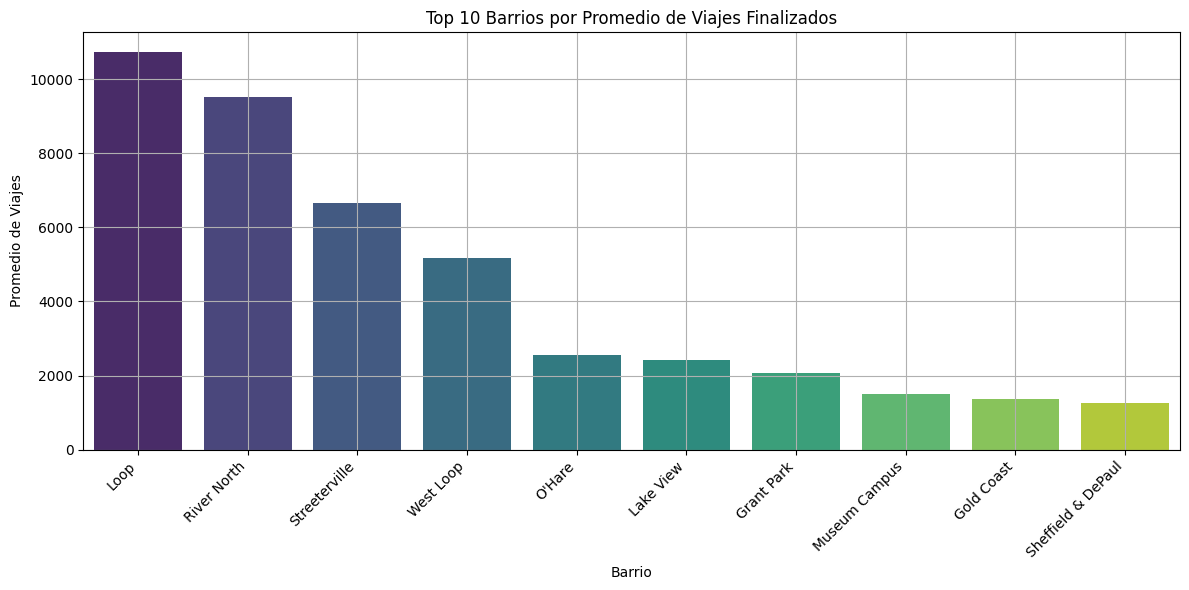

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10_neighborhoods,
    x='dropoff_location_name',
    y='average_trips',
    palette='viridis'
)

plt.title('Top 10 Barrios por Promedio de Viajes Finalizados')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Viajes')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El gráfico de barras con el top 10 por barrios es excelente y los resultados son los esperados. 

Muy buen formato para los comentarios! 

</div>

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;"> 

**Conclusiones principales del top 10 de Barrios donde finaliza un servicio**

El gráfico de barras confirma lo visto en la observación de los resultados anteriores: que el barrio Loop tiene un volumen de viajes muy superior al resto de los barrios. Es el barrio donde más viajes terminan en todo Chicago. Lo anterior sugiere que la mayor parte de la demanda de taxis se concentra en zonas probablemente céntricas y de alta actividad comercial.

A partir del top 4, la caída es pronunciada; los demás barrios tienen entre 1200 y 5000 viajes aproximadamente. Esto muestra que la demanda no está distribuida de forma uniforme.

</div>

### Identificar Empresas de taxis VS número de viajes 

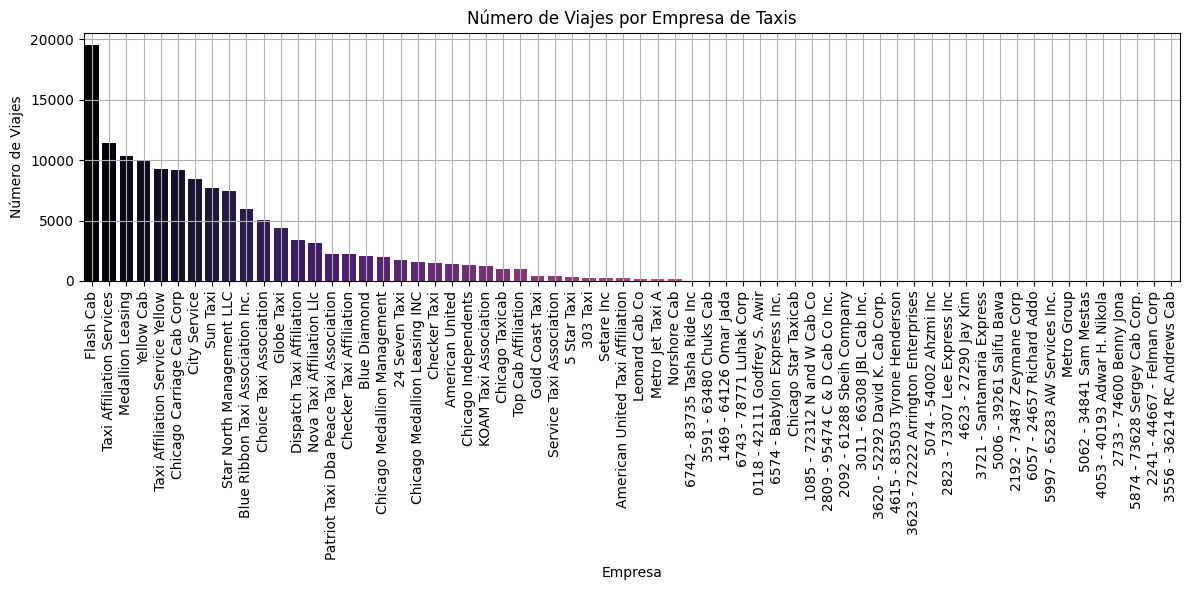

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=companies_dataset.sort_values(by='trips_amount', ascending=False),
    x='company_name',
    y='trips_amount',
    palette='magma'
)

plt.title('Número de Viajes por Empresa de Taxis')
plt.xlabel('Empresa')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! El gráfico es correcto y refleja adecuadamente el resultado esperado.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Para mejorar la visualización, podrías mostrar solo el top 10 o 20, enfocándote en las principales empresas.

</div>

</div>

In [55]:
top10_companies = companies_dataset.sort_values(
    by='trips_amount',
    ascending=False
).head(10)

top10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


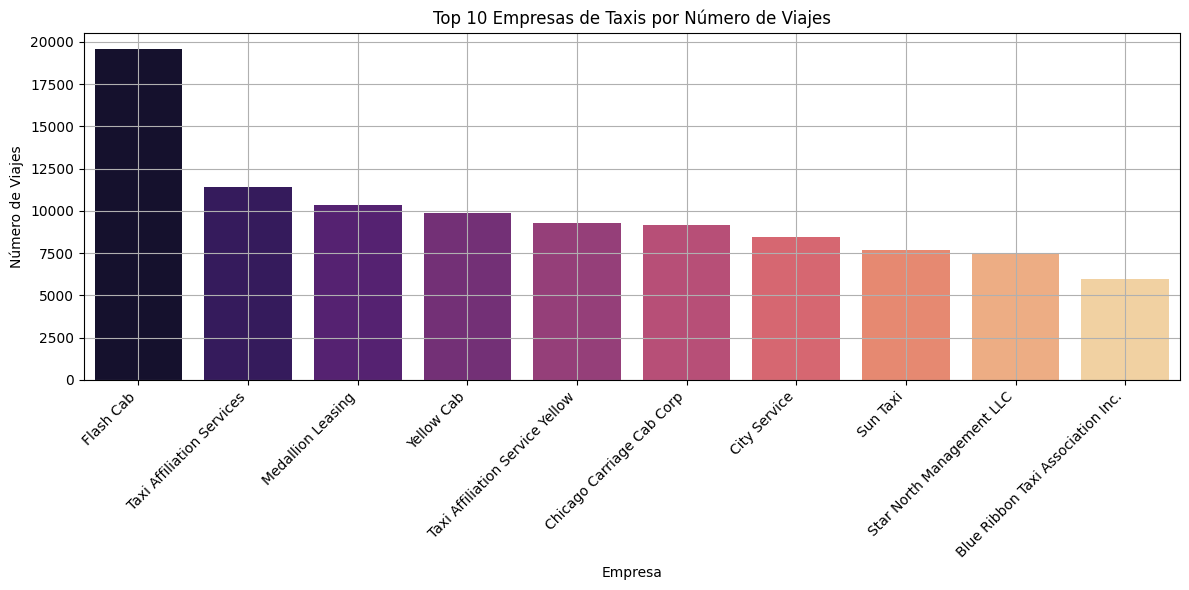

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10_companies,
    x='company_name',
    y='trips_amount',
    palette='magma'
)

plt.title('Top 10 Empresas de Taxis por Número de Viajes')
plt.xlabel('Empresa')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Este gráfico es excelente! Podrías dejar este plot y eliminar el anterior.

</div>


<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;"> 
    
**Conclusiones principales sobre la cantidad de viajes por compañía de taxis**

El análisis de las 64 compañías muestra una fuerte concentración del mercado. Flash Cab domina con más de 19 000 viajes, seguida por unas pocas empresas grandes como Taxi Affiliation Services que ocupa el segundo lugar, pero con una diferencia considerable.

A partir de la empresa #5, la cantidad de viajes disminuye de forma abrupta. Las empresas del puesto 5 al 15 tienen menos de la mitad de los viajes de Flash Cab. Esto muestra un mercado muy desigual, donde unas pocas compañías concentran la mayor parte de la actividad, la mayoría opera a pequeña escala.

</div>

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;"> 

**COMENTARIOS DE CIERRE PASO 4:**

1. El mercado de taxis en Chicago está altamente concentrado tanto en oferta (compañías) como en demanda (barrios).

Los datos muestran que la mayoría de los viajes se concentran en unos pocos barrios, y que unas pocas empresas realizan la mayor parte de los viajes.
Esto revela un sistema desigual y centralizado, donde la actividad no se distribuye de manera uniforme.

2. La concentración en barrios favorece a las empresas grandes.

Como los viajes se concentran en zonas específicas de alta demanda, las empresas grandes capturan la mayor parte de esa actividad. Las empresas pequeñas, aunque numerosas, operan con volúmenes muy bajos, lo que refuerza la brecha entre líderes y rezagadas.

3. Para un nuevo competidor como Zuber, esto implica un mercado difícil de penetrar, donde será necesario enfocarse en zonas estratégicas de alta demanda para competir con actores ya establecidos.

</div>

# Paso 5: Prueba de hipótesis
**"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".**

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo formulando la hipótesis! Es fundamental que sea claro lo que se busca analizar.

</div>

### Importar y revisar dataset 

In [57]:
weather_dataset = pd.read_csv('/datasets/project_sql_result_07.csv')

In [58]:
print(weather_dataset.head())
print()
weather_dataset.info()
print()
weather_dataset.describe()

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB



,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [59]:
weather_dataset.duplicated().sum()

197

In [17]:
weather_dataset[weather_dataset.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


<div style="background-color: #f0ebf3; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;"> 

**COMENTARIOS:**

- La columna start_ts es tipo object, para identificar los sábados requiere conversión a datetime.
- No hay valores nulos.
- El valor mínimo de 0 segundos, lo cual me parece interesante, probablemente sea un error o asi se vean los viajes cancelado.
- Hay 197 filas duplicadas. Probablemente porque el dataset viene de la consulta SQL y agrupa viajes por hora, y varios viajes empezaron exactamente a la misma hora, el clima era el mismo y la duración fue igual. Estos duplicados no afectan la prueba de hipótesis.

</div>

In [18]:
weather_dataset['start_ts'] = pd.to_datetime(weather_dataset['start_ts'])

In [19]:
weather_dataset['day'] = weather_dataset['start_ts'].dt.day_name()

In [26]:
weather_dataset['day'].unique()

array(['Saturday'], dtype=object)

In [22]:
saturdays_good = weather_dataset[weather_dataset['weather_conditions'] == 'Good']
saturdays_bad = weather_dataset[weather_dataset['weather_conditions'] == 'Bad']

In [24]:
print("Good", len(saturdays_good))
print("Bad:", len(saturdays_bad))

Good 888
Bad: 180


In [29]:
saturdays_good['duration_seconds'].mean()

1999.6756756756756

In [30]:
saturdays_bad['duration_seconds'].mean()

2427.2055555555557

### Planteamiento para probar la hipótesis 

In [32]:
H0 = "La duración promedio de los viajes en sábados lluviosos es igual a la de sábados no lluviosos."
H1 = "La duración promedio de los viajes en sábados lluviosos es diferente a la de sábados no lluviosos."

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al realizar una prueba de hipótesis, es muy importante verificar los supuestos. El t-test que usaste funciona bien cuando se cumplen ciertos supuestos, como que las varianzas de ambos grupos (sábados lluviosos y no lluviosos) sean similares. Puedes realizar la prueba de levene para comprobar que los dos grupos tienen la misma varianza y, de esta forma, podrás saber el valor del parámetro equal_var que se debe utilizar en la función stats.ttest_ind.

</div>

In [38]:
alpha = 0.05
results = stats.ttest_ind(
    saturdays_good['duration_seconds'], 
    saturdays_bad['duration_seconds'],
)

print('El valor p es:', results.pvalue)
print()
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula que dice:")
    print(H0)
    print("Porque sí existe evidencia estadística significativa de que son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula que dice:")
    print(H0)
    print("'No hay evidencia estadística suficiente para afirmar que son diferentes.'")
print()
print(f"Media sábados no lluviosos: {saturdays_good['duration_seconds'].mean():.4f}") 
print(f"Media sábados lluviosos: {saturdays_bad['duration_seconds'].mean():.4f}")

El valor p es: 6.517970327099473e-12

Rechazamos la hipótesis nula que dice:
La duración promedio de los viajes en sábados lluviosos es igual a la de sábados no lluviosos.
Porque sí existe evidencia estadística significativa de que son diferentes.

Media sábados no lluviosos: 1999.6757
Media sábados lluviosos: 2427.2056


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Interpretaste correctamente el valor p y sacaste conclusiones estadísticas válidas. Debemos rechazar efectivamente la hipótesis nula. 

</div>

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;"> 

**Conclusiones sobre la prueba de hipótesis** 

Para evaluar si el clima lluvioso afecta la duración de los viajes desde el barrio Loop hasta el Aeropuerto Internacional O'Hare en Chicago, definí las siguientes hipótesis:
  
Hipótesis nula: La duración promedio de los viajes en sábados lluviosos es igual a la de sábados no lluviosos.

Hipótesis alternativa: La duración promedio de los viajes en sábados lluviosos es diferente a la de sábados no lluviosos.

Utilicé una prueba t para dos muestras independientes (stats.ttest_ind) porque estoy comparando las medias de dos grupos distintos (Good vs Bad)

Establecí un nivel de significancia de α = 0.05 como aprendí en proyectos anteriores.

Existe evidencia estadística suficiente de que la duración promedio de los viajes es mayor en sábados con clima desfavorable. La diferencia entre los sabados lluviosos y los sabados no lluviosos es extremadamente improbable que sea producto del azar. Los sábados con clima “Bad” tienen viajes ~427 segundos más largos, es decir: 7.1 minutos adicionales en promedio. Esto es un efecto real, consistente y estadísticamente sólido.

</div>

<div style="background-color: #e7f3ff; padding: 15px; border-radius: 5px; border-left: 5px solid #2196F3;"> 
    
**CIERRE GENERAL**

En este proyecto analizamos datos reales del sistema de taxis de Chicago para entender cómo se distribuyen los viajes entre las compañías, en qué barrios finalizan con mayor frecuencia y si el clima lluvioso afecta la duración de los viajes hacia el aeropuerto O’Hare.

En el análisis exploratorio observamos que el mercado está fuertemente concentrado: unas pocas compañías acumulan la mayor parte de los viajes, un pequeño grupo de empresas aporta un porcentaje muy alto del total. La mayoría de las compañías opera con volúmenes de viaje considerablemente menores.

También identificamos que los viajes finalizan principalmente en zonas céntricas como Loop, River North y Streeterville. Estos barrios presentan un promedio de viajes muy superior al resto, lo que indica que la demanda no está distribuida de manera uniforme en la ciudad.

Finalmente, realizamos una prueba de hipótesis para evaluar si los sábados lluviosos afectan la duración de los viajes desde el Loop hacia el Aeropuerto O’Hare. Con un p‑value extremadamente bajo, rechazamos la hipótesis nula y concluimos que sí existe evidencia estadística de que los viajes duran más cuando llueve. Las medias de duración confirmaron esta diferencia.

</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Dejas durante todo el proyecto comentarios correctos y conclusiones super claras.

Además, el formato general del proyecto es impecable.

</div>